# Analiza smucarskih skakalcev

## Nalaganje vseh podatkov

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
smucarski_skakalci = pd.read_csv('smucarski_skakalci.csv', index_col="koda")
world_cup = pd.read_csv('world_cup.csv', index_col="koda")

In [78]:
#s to funkcijo sem pregledala katera država ima največ smucarskih skakalcev

#katera ima največ registriranih skakalcev
prestej_st_registriranih = smucarski_skakalci.groupby('drzava').size().reset_index(name= 'st_registriranih')
uredi_padajoce = prestej_st_registriranih.sort_values(by= 'st_registriranih', ascending = False)
print(uredi_padajoce)

#katera ima največ skakalcev ki so tekmovali v world cupu v zadnjih 10ih letih
prestej_tekmovalce = world_cup.groupby('drzava').size().reset_index(name= 'st_tekmovalcev')
uredi = prestej_tekmovalce.sort_values(by= 'st_tekmovalcev', ascending = False)
print(uredi)

                          drzava  st_registriranih
63                         Japan               955
46                       Germany               916
8                        Austria               690
91                        Norway               674
107                     Slovenia               600
..                           ...               ...
130                     Zimbabwe                11
30                Czechoslovakia                 3
40   Federal Republic Of Germany                 2
65                    Jugoslavia                 1
19         C. Independent States                 1

[131 rows x 2 columns]
   drzava  st_tekmovalcev
0     AUT             129
12    NOR             123
7     GER             107
16    SLO             105
13    POL              87
..    ...             ...
1     BUL              10
18    TUR               8
14    ROU               3
19    UKR               3
11    KOR               1

[21 rows x 2 columns]


In [80]:
#ta funkcija pokaže koliko tekmovalcev je imela vsaka država v zadnjih 10ih letih v world cupu
prestej_tekmovalce = world_cup.groupby(['leto', 'drzava']).size().reset_index(name='st_tekmovalcev')
pivot_tabela = prestej_tekmovalce.pivot(index='drzava', columns='leto', values='st_tekmovalcev')
pivot_tabela_brez_nan = pivot_tabela.fillna(0).astype(int) #da ni v tabeli NaN ampak je 0
pivot_tabela_preurejeno = pivot_tabela_brez_nan.sort_values(by=2015, ascending=False) #da imam v padajočem vrstnem letu glede na 2024
print(pivot_tabela_preurejeno)

leto    2015  2016  2017  2018  2019  2020  2021  2022  2023  2024
drzava                                                            
NOR       13    10    12    13    14    14     8    14    15    10
GER       12    11    10     9    12    11    12    11    11     8
AUT       12    12    13    14    12    12    16    15    15     8
SLO       11    10    10    13    12    10    11    10    10     8
POL        9     8     8     7     8     9    11     9    12     6
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
EST        0     0     1     1     2     1     1     2     2     1
KAZ        0     0     5     4     2     2     0     2     2     0
ROU        0     0     0     0     0     0     0     2     1     0
TUR        0     0     1     2     0     0     0     2     2     1
UKR        0     0     0     0     0     0     0     0     1     2

[21 rows x 10 columns]


In [112]:
world_cup_2024 = world_cup[world_cup['leto'] == 2024]
povprecja_2024 = world_cup_2024.groupby('drzava').mean(numeric_only= True)
samo_zeljene_vrednosti = povprecja_2024[['skupna_uvrstitev', 'skupno_st_tock', 'poleti_uvrstitev', 'poleti_st_tock']]
urejeno_skupno_2024 = samo_zeljene_vrednosti.sort_values(by='skupna_uvrstitev', ascending=True)
print(urejeno_skupno_2024)

urejeno_poleti_2024 = samo_zeljene_vrednosti.sort_values(by='poleti_uvrstitev', ascending=True)
print(urejeno_poleti_2024)


        skupna_uvrstitev  skupno_st_tock  poleti_uvrstitev  poleti_st_tock
drzava                                                                    
AUT            15.000000      814.875000         11.166667      162.000000
GER            26.500000      490.250000         25.333333       47.375000
SLO            28.500000      484.000000         19.000000      136.625000
NOR            32.100000      308.000000         22.571429       54.300000
CZE            33.000000      163.000000               NaN        0.000000
...                  ...             ...               ...             ...
FIN            45.000000       77.500000         33.000000       12.500000
UKR            45.000000       28.500000         23.000000       25.500000
USA            46.666667       70.666667         26.500000       33.666667
FRA            61.000000        8.000000               NaN        0.000000
TUR            64.000000        3.000000               NaN        0.000000

[16 rows x 4 columns]
  

In [137]:
najboljsih_10 = world_cup[world_cup['skupna_uvrstitev'] <= 10]
#print(najboljsih_10)

prestej_tekmovalce = najboljsih_10.groupby(['leto', 'drzava']).size().reset_index(name='st_tekmovalcev')
pivot_tabela = prestej_tekmovalce.pivot(index='drzava', columns='leto', values='st_tekmovalcev')
pivot_tabela_brez_nan = pivot_tabela.fillna(0).astype(int) #da ni v tabeli NaN ampak je 0
pivot_tabela_preurejeno = pivot_tabela_brez_nan.sort_values(by=2015, ascending=False) #da imam v padajočem vrstnem letu glede na 2024
print(pivot_tabela_preurejeno)

leto    2015  2016  2017  2018  2019  2020  2021  2022  2023  2024
drzava                                                            
AUT        3     2     3     1     1     2     0     2     3     3
NOR        2     4     1     4     2     2     3     2     1     2
CZE        1     0     0     0     0     0     0     0     0     0
GER        1     2     2     3     2     2     2     2     1     2
JPN        1     1     0     0     1     1     1     1     1     1
POL        1     0     2     2     3     2     3     0     2     0
SLO        1     1     2     0     1     1     1     3     2     2


In [129]:
#po vsej verjetnosti nebom uporabila
najboljsi_skakalci = pd.DataFrame()


# 3. Loop skozi vsako leto, pridobi top 10 skakalcev in dodaj v DataFrame
for leto in [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]:
    # Filtriraj podatke za določeno leto in jih uredi po uvrstitvi
    top_10 = world_cup[world_cup['leto'] == leto].sort_values(by='skupna_uvrstitev').head(10)
    
    # Dodaj stolpec v DataFrame z imenom leta in priimki top 10 skakalcev
    najboljsi_skakalci[leto] = top_10['priimek'].values

# 4. Prikaz rezultata
print(najboljsi_skakalci)

        2015       2016       2017       2018       2019       2020  \
0     Freund     Freund     Freund     Freund     Freund     Freund   
1      Prevc      Prevc      Prevc      Prevc      Prevc      Prevc   
2   Granerud   Granerud   Granerud   Granerud   Granerud   Granerud   
3      Prevc      Prevc      Prevc      Prevc      Prevc      Prevc   
4  Kobayashi  Kobayashi  Kobayashi  Kobayashi  Kobayashi  Kobayashi   
5   Granerud   Granerud   Granerud   Granerud   Granerud   Granerud   
6      Kraft      Kraft      Kraft      Kraft      Kraft      Kraft   
7      Kraft      Kraft      Kraft      Kraft      Kraft      Kraft   
8      Stoch      Stoch      Stoch      Stoch      Stoch      Stoch   
9      Kraft      Kraft      Kraft      Kraft      Kraft      Kraft   

        2021       2022       2023       2024  
0     Freund     Freund     Freund     Freund  
1      Prevc      Prevc      Prevc      Prevc  
2   Granerud   Granerud   Granerud   Granerud  
3      Prevc      Prevc   

In [134]:
top_10_2024 = world_cup[world_cup['leto'] == 2024].sort_values(by='skupna_uvrstitev').head(10)
top_10_priimkov = top_10_2024['priimek'].values

# 3. Ustvari prazen DataFrame za shranjevanje uvrstitev
uvrstitve_po_letih = pd.DataFrame(index=top_10_priimkov, columns=world_cup['leto'].unique())

# 4. Loop skozi vsakega skakalca in za vsako leto zabeleži uvrstitev
for skakalec in top_10_priimkov:
    for leto in uvrstitve_po_letih.columns:
        # Filtriraj podatke za določenega skakalca in leto
        uvrstitev = world_cup[(world_cup['priimek'] == skakalec) & (world_cup['leto'] == leto)]['skupna_uvrstitev']
        
        # Če je skakalec bil uvrščen v tistem letu, zabeleži uvrstitev
        if not uvrstitev.empty:
            uvrstitve_po_letih.at[skakalec, leto] = uvrstitev.values[0]
        else:
            # Če ni bil uvrščen, zabeleži NaN
            uvrstitve_po_letih.at[skakalec, leto] = None

# 5. Prikaz rezultata
print(uvrstitve_po_letih)

           2015  2016  2017  2018  2019  2020  2021  2022  2023  2024
Kraft       3.0   6.0   1.0   4.0   2.0   1.0  17.0   5.0   2.0   1.0
Kobayashi  44.0  42.0  54.0  11.0   1.0   3.0   4.0   1.0   5.0   2.0
Wellinger  35.0  17.0   4.0   6.0  18.0  None   NaN  29.0   7.0   3.0
Hoerl      None  None  None  None  43.0  27.0  39.0   9.0  13.0   4.0
Prevc       1.0   1.0   6.0  15.0  13.0   8.0  22.0  10.0  18.0   5.0
Hayboeck    5.0   4.0   7.0  23.0  27.0  22.0  18.0  37.0  12.0   6.0
Forfang    23.0   5.0  27.0   7.0   8.0  12.0  19.0  24.0  16.0   7.0
Lindvik    None  None  None  41.0  44.0   7.0  10.0   3.0  20.0   8.0
Kos        None  None  None  None  None  None  62.0  18.0  22.0   9.0
Paschke    82.0  74.0   NaN  30.0  59.0  21.0  15.0  33.0  34.0  10.0


In [190]:
prestej_klube = smucarski_skakalci.groupby('klub').count()
uredi_klube= prestej_klube.sort_values(by = 'id', ascending= False)
print(uredi_klube['id'].head(12))

samo_aktivni = smucarski_skakalci[smucarski_skakalci['status'] == 'Active']
prestej_klube_aktivnih = samo_aktivni.groupby('klub').count()
uredi_klube= prestej_klube_aktivnih.sort_values(by = 'id', ascending= False)
print(uredi_klube['id'].head(12))
#še komentiraj

klub
SK Triglav Kranj          47
Altius Nordic Ski Club    38
Einsiedeln                38
SSK Ilirija               36
Lahden Hiihtoseura        34
Puijon Hiihtoseura        33
SC Oberstdorf             27
Sk Triglav kranj          25
Courchevel                25
Sc Partenkirchen          25
SG Nickelhuette Aue       23
WSS Wisla                 23
Name: id, dtype: int64
klub
Bakuriani                         19
CLUB DES SPORTS COURCHEVEL        18
SSK ILIRIJA                       16
Chinese Ski Association           15
SSK NORICA ZIRI                   15
Belarus Ski Jumping Federation    11
Am Bachtel                        10
Sk Triglav kranj                  10
TJ Dukla Liberec                   9
SK TRIGLAV KRANJ                   9
SK ZAGORJE                         8
CSS BRASOVIA                       8
Name: id, dtype: int64


<Axes: xlabel='spol'>

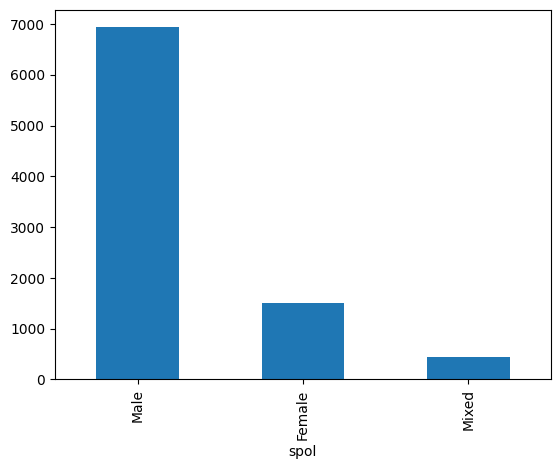

In [160]:
prestej_spole = smucarski_skakalci.groupby('spol').count()
uredi_spole = prestej_spole.sort_values(by = 'id', ascending= False)
uredi_spole['id'].plot.bar()

<Axes: xlabel='status'>

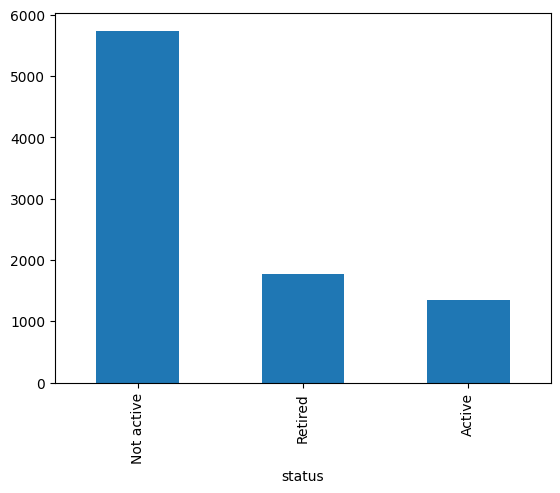

In [155]:
prestej_statuse = smucarski_skakalci.groupby('status').count()
uredi_statuse= prestej_statuse.sort_values(by = 'id', ascending= False)
uredi_statuse['id'].head(3).plot.bar()

<Axes: xlabel='spol'>

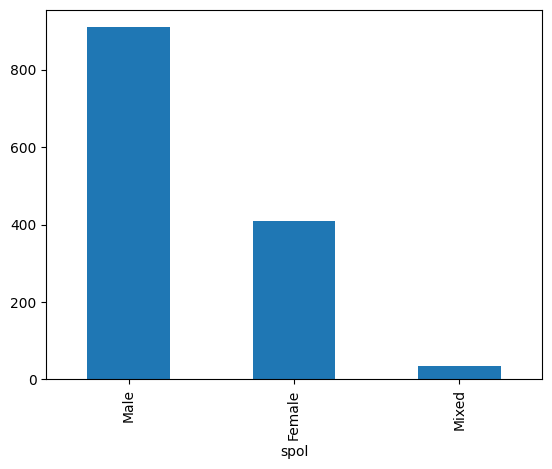

In [187]:
samo_aktivni = smucarski_skakalci[smucarski_skakalci['status'] == 'Active']
spol_aktivnih = samo_aktivni.groupby('spol').count()
uredi_spole_aktivnih = spol_aktivnih.sort_values(by = 'id', ascending= False)
uredi_spole_aktivnih['id'].plot.bar()


#iz tega vidimo, da je med aktivnimi razlika med številom moških in žensk manjša, saj je v zadnjih letih vedno več ženskih smučarskih skakalk, ki pa so v veliki večini še aktivne.
#Ampak kot vidimo je še vedno šport dominiran z moškimi, vendar manj kot v preteklosti.
#prav tako pa lahko opazimo, da se število mešanih ekip tudi zmanjšujje, saj jih je bilo v prejšnjem grafu po številu veliko več.

<Axes: xlabel='smuci'>

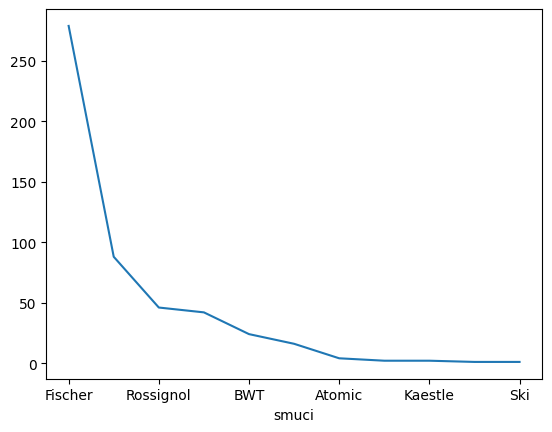

In [164]:
prestej_smuci = smucarski_skakalci.groupby('smuci').count()
uredi_smuci= prestej_smuci.sort_values(by = 'id', ascending= False)
uredi_smuci['id'].plot()
#vidimo, da za tiste, ki so imeli podatke o smuček jih velika večina uporablja Fisher, vendar je bilo ubistvu zelo malo znanih podatkov(505)

In [166]:
smucarski_skakalci["starost"] = 2024 -smucarski_skakalci["rojstno_leto"]

                      drzava    starost  stevilo_tekmovalcev
30                  Slovenia  20.117647                  191
23                    Norway  23.885714                  142
9                    Germany  19.952756                  136
15                     Japan  22.073394                  113
27                    Russia  23.700000                   93
0                    Austria  21.000000                   80
25                    Poland  20.750000                   71
24                P.r. China  22.560606                   69
7                     France  16.841270                   65
26                   Romania  18.732143                   58
32               Switzerland  20.435897                   41
6                    Finland  21.277778                   38
4                    Czechia  17.875000                   36
16                Kazakhstan  19.740741                   29
36  United States Of America  19.291667                   25


<Axes: >

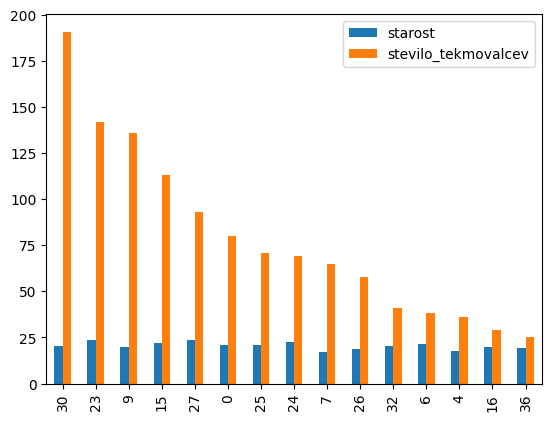

In [184]:
#poglejmo kakšne so povprečne starosti trenutno aktivnih smucarskih skakalcev v posamezni državi in koliko jih je sploh aktivnih
smucarski_skakalci["starost"] = 2024 -smucarski_skakalci["rojstno_leto"]
samo_aktivni = smucarski_skakalci[smucarski_skakalci['status'] == 'Active']

razvrstimo_po_drzavah = samo_aktivni.groupby('drzava')
povprecna_starost = razvrstimo_po_drzavah['starost'].mean()
stevilo_tekmovalcev = samo_aktivni.groupby('drzava').size().reset_index(name='stevilo_tekmovalcev')

# Združimo podatke glede na drzavo
zdruzena_tabela= pd.merge(povprecna_starost, stevilo_tekmovalcev, on='drzava')
koncna_tabela = zdruzena_tabela.sort_values(by='stevilo_tekmovalcev', ascending=False)

print(koncna_tabela.head(15))
koncna_tabela.head(15).plot.bar()

#V tej tabeli lahko vidimo, da ima Slovenija trenutno daleč največ aktivnih smucarskih skakalcev in da so zelo mladi, povprecje vseh drzav pa se giba okoli 20-tega leta.

#pogledaš lahko še kakšna je povprečna starost po državi glede na world cup,  tu pa moraš združiti tabele, ali pa da primerjaš za vsako leto koliko so bili v povprečju stari!!!